In [49]:
import os
import numpy as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
data=pd.read_csv("/content/drive/MyDrive/Fraud.csv")
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [53]:
data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [54]:
data.isnull().sum()
#there is no null value in our dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [55]:
#number of duplicate value
data.duplicated().sum()

0

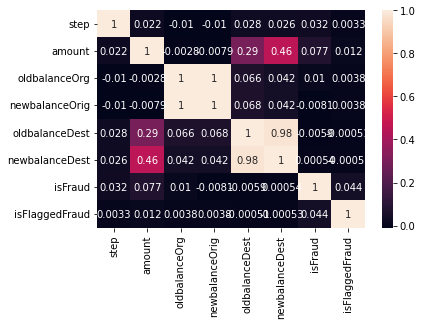

In [56]:

sns.heatmap(data.corr(),annot=True)

It seens like isfraud is more correlation with amount

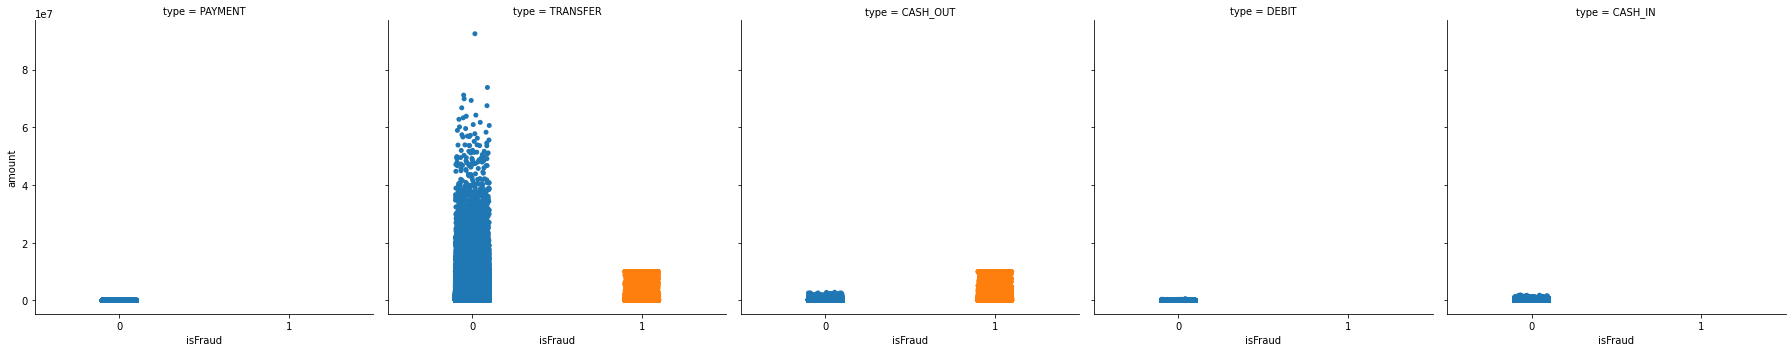

In [57]:
sns.catplot(x="isFraud",y="amount",col="type",data=data)

here 
0 means not fraud
1 means fraud. there are more fraud in transfer and cash out compare to all the methods

In [58]:
# finding top 10 fraud amount transaction
data[data['isFraud']==1]["amount"].nlargest(10)

4440       10000000.0
4441       10000000.0
481250     10000000.0
481251     10000000.0
586311     10000000.0
586312     10000000.0
1030559    10000000.0
1030560    10000000.0
1030661    10000000.0
1030662    10000000.0
Name: amount, dtype: float64

In [59]:
# finding top 10 normal amount transaction
data[data['isFraud']==0]["amount"].nlargest(10)

3686583    92445516.64
4060598    73823490.36
4146397    71172480.42
3946920    69886731.30
3911956    69337316.27
3937152    67500761.29
4105338    66761272.21
3892529    64234448.19
3991638    63847992.58
4143801    63294839.63
Name: amount, dtype: float64

In [60]:
#combining all the objects one list
obj_cols=data.dtypes=='object'
obj_cols=list(obj_cols[obj_cols].index)
obj_cols

['type', 'nameOrig', 'nameDest']

In [61]:
#combine all numeric value into one list
num_cols=(data.dtypes!="object")
num_cols=list(num_cols[num_cols].index)
num_cols

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


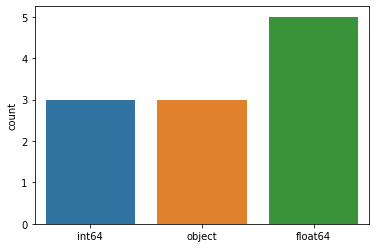

In [62]:
#counting datatype
sns.countplot(data.dtypes.map(str))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


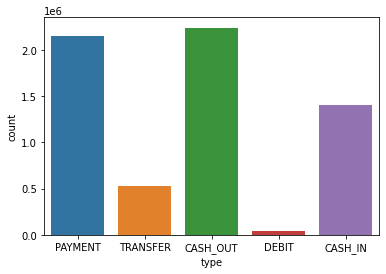

In [63]:
sns.countplot(data.type)

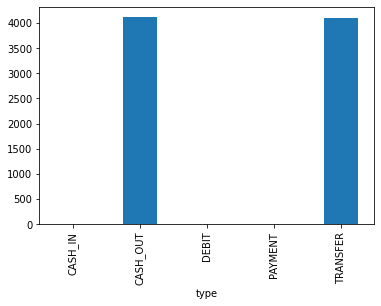

In [64]:
df_group=data.groupby('type')['isFraud'].sum().plot(kind='bar')
df_group

##Implementation of Model

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [74]:
X=data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
y=data[['isFraud']]

in this model take only the numerical data to predict the output.and there is no need of the step,type,nameorig,nameDest,isflaggedFraud because this features are not depend on the is the customer is fraud or not. 

and we divide the data into x and y. in x we give all the who important for the predicting the customer ia fraud or not. in y we take all the frauded or not fraud value.

In [75]:
X.head(5)

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.0,160296.36,0.0,0.0
1,1864.28,21249.0,19384.72,0.0,0.0
2,181.00,181.0,0.00,0.0,0.0
3,181.00,181.0,0.00,21182.0,0.0
4,11668.14,41554.0,29885.86,0.0,0.0


In [76]:
y.head(5)

,isFraud
0,0
1,0
2,1
3,1
4,0


In [83]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=50)

In [84]:
clf=RandomForestClassifier(max_depth=8)
clf.fit(x_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=8)

In [85]:
x_pred=clf.predict(x_test)

In [87]:
print(classification_report(y_test,x_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.98      0.57      0.72      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.78      0.86   1272524
weighted avg       1.00      1.00      1.00   1272524



In [91]:
print("accuracy score of model ",accuracy_score(y_test,x_pred))


accuracy score of model  0.9994271227890398


In [93]:
print(confusion_matrix(y_test,x_pred))

[[1270863      18]
 [    711     932]]


In [103]:
clf.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

##key factors

in this data set we have amount  feature for predicting the fraudulent customer,

if the whole amount is withdraw then we can say,its fraudulent customer.

Company should adopt the updation to account if the coustomer withdraw whole amount from his/her account then we can validate the user by one of the authenication method.

if this action is create i think its help to the bank to save the customer from frauding his/her money.